#  Diabetes prediction dataset EDA

# About Authors: 
* Saif Ur Rehman
*  Zeeshan Shaukat
* Raja Haris
* Muhammad Hamza Shakeel
* Ahmad Hassan

## About Dataset: 
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

## Task:

We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings

## Objectives:

The primary aim of this project is to conduct a thorough analysis of the dataset to identify significant insights. The ultimate goal is to predict Diabetes, hypertension and heart disease in patients and their relationship with each other.

# 1. Import Libraries

In [92]:
# !pip install seaborn

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### We will use the follwoing libraries
* Pandas: Data manipulation and analysis library.
* Numpy: Numerical computing library.
* Matplotlib: Data visualization library.
* Seaborn: Statistical data visualization library.
* Plotly : Interactive Data visualization library.
   

### loading dataset
* Loading the dataset from a CSV file. The data is assumed to be in the format of: CSV File



In [94]:
df = pd.read_csv('data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 2. Metadata
* Gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
  
* Age : Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
  
* Hypertension : Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0.
  
* Heart_disease	: Heart disease is another medical condition that is associated with an increased risk of developing diabetes.
  
* Smoking_history : Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated.

* BMI: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.
  
* HbA1c_level: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels.
  
* Blood_glucose_level: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key.
  
* Diabetes: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the

### Get a sneak peek of your data

In [95]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [96]:
df.shape

(100000, 9)

In [97]:
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are 100000, and columns are 9


In [98]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Observations
*  7 Numerical Column
*  2 Categorical Column
*  100000 Rows x 9 Coumns
*  total size = 900000 

In [99]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Text(0.5, 1.0, 'Missing null values')

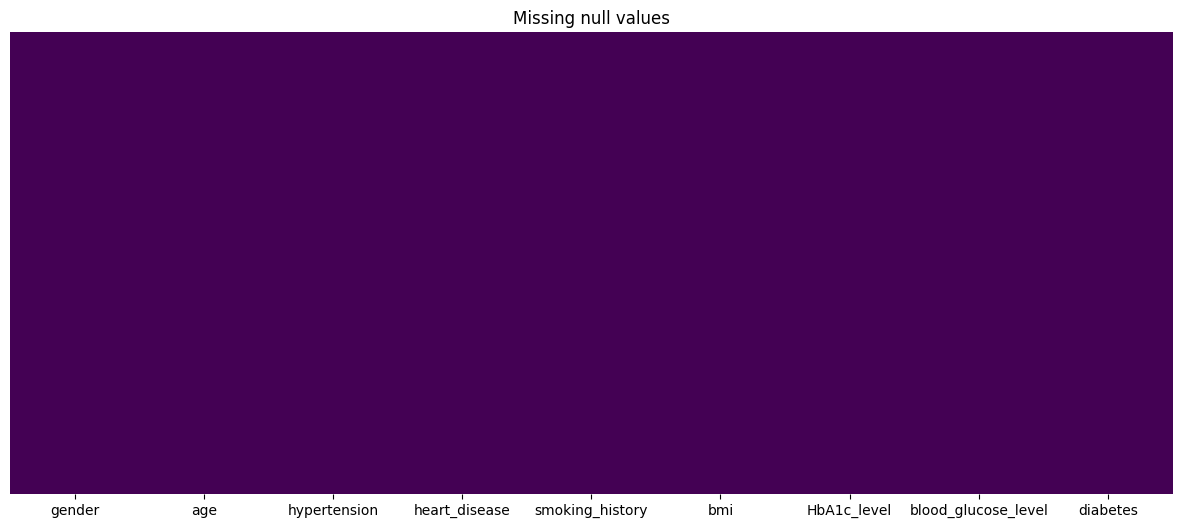

In [100]:
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

### No Missing Values

In [101]:
df.duplicated().sum()

3854

### 3854 Duplicated Values Found

In [102]:
df[df.duplicated(keep=False)].sort_values(by='age')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
84163,Male,0.72,0,0,No Info,27.32,6.2,159,0
51119,Male,0.72,0,0,No Info,27.32,6.2,159,0
41870,Male,1.32,0,0,No Info,27.32,6.6,159,0
88174,Male,1.32,0,0,No Info,27.32,6.6,159,0
86304,Male,1.64,0,0,No Info,27.32,6.1,140,0
...,...,...,...,...,...,...,...,...,...
38567,Female,80.00,0,0,No Info,27.32,6.5,126,0
82100,Female,80.00,0,0,No Info,27.32,5.0,140,0
38652,Female,80.00,0,0,No Info,27.32,5.8,140,0
40469,Male,80.00,0,0,former,27.32,5.0,145,0


In [103]:
df[df.duplicated(keep=False)].sort_values(by='HbA1c_level')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
49919,Male,51.0,0,0,No Info,27.32,3.5,130,0
25112,Female,53.0,0,0,never,27.32,3.5,158,0
51081,Male,28.0,0,0,never,27.32,3.5,159,0
77941,Male,73.0,0,0,No Info,27.32,3.5,85,0
8214,Female,19.0,0,0,No Info,27.32,3.5,160,0
...,...,...,...,...,...,...,...,...,...
36595,Female,80.0,0,0,No Info,27.32,8.8,240,1
95203,Female,80.0,0,0,No Info,27.32,9.0,220,1
99054,Female,53.0,0,0,never,27.32,9.0,160,1
5255,Female,53.0,0,0,never,27.32,9.0,160,1


In [104]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [105]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [106]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='HbA1c_level'>

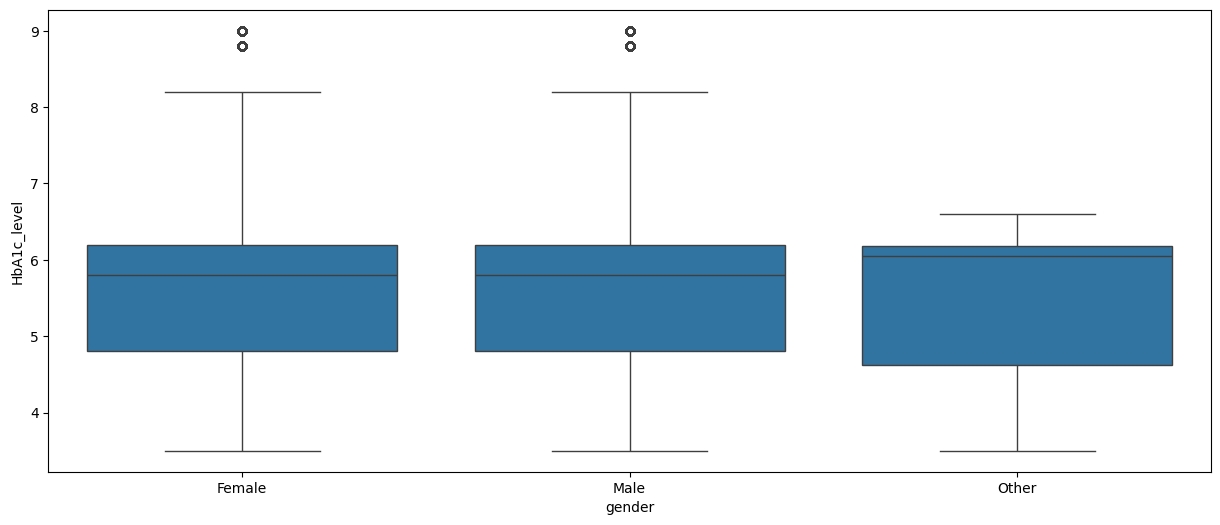

In [107]:
sns.boxplot(df, x= 'gender' , y='HbA1c_level')

In [108]:
# !pip install nbformat
# !pip install --upgrade pip
import plotly.express as px

fig = px.histogram(df, x="HbA1c_level", y = 'age')
fig.show()

### Droping the duplicates
  * According to our observation, not all data can be same. i.e:
  * gender,	age,	hypertension,	heart_disease,	smoking_history,	bmi,	HbA1c_level,	blood_glucose_level, and	diabetes

In [109]:
df.drop_duplicates(inplace=True)

In [110]:
df.duplicated().sum()

0

In [111]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [112]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [113]:
# #convert the numerical column heart_disease to categorical data
# df[['heart_disease_categorical','hypertension_categorical','diabetes_categorical']] = pd.Categorical(df[['heart_disease','hypertension','diabetes' ]])
# # df.drop(columns='heart_disease_cateogrical',inplace=True) 

df[['heart_disease_categorical', 'hypertension_categorical', 'diabetes_categorical']] = df[['heart_disease', 'hypertension', 'diabetes']].apply(lambda x: pd.Categorical(x))

In [114]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,heart_disease_categorical,hypertension_categorical,diabetes_categorical
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,0,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1,0


In [115]:
df['age'].max()

80.0

In [116]:
bins = [0,10,18,30,50,80]
labels = ['children', 'teenagers', 'youngs', 'middle','old_age']
df['age_cateogry'] = pd.cut(df['age'],bins = bins, labels = labels)

In [117]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,heart_disease_categorical,hypertension_categorical,diabetes_categorical,age_cateogry
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0,0,old_age
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0,0,old_age
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,0,0,youngs
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,0,0,middle
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1,0,old_age


In [118]:
df.shape

(96146, 13)

In [119]:
#Draw sunbust on df clumns gender, diabetes_categorical, smoking_history


import plotly.express as px
fig = px.sunburst(
   df,
    path=['gender', 'age_cateogry','hypertension_categorical','heart_disease_categorical'],
    values= 'diabetes',
    color='gender',
    #  hover_data=['age_cateogry, 'hypertension_categorical']
)

# Show the Sunburst chart
fig.show()

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Insights
* The observation on basis of gender is as follows:
### Female: 4447
* Old_age : 3464 Diabetic Patients
* Middle : 812 Diabetic Patients
* Youngs : 119 Diabetic Patients
* teenagers : 35 Diabetic Patients

### Male: 4035
* Old_age : 3170 Diabetic Patients
* Middle : 735 Diabetic Patients
* Youngs : 90 Diabetic Patients
* teenagers : 28 Diabetic Patients

### Others: 0

### Q1. Comparatively who has more Diabetes?
A. Based on given data females has more diabetes than male.

In [120]:
import plotly.express as px
fig = px.sunburst(
   df,
    path=['gender', 'age_cateogry','hypertension_categorical','heart_disease_categorical'],
    values= 'heart_disease',
    color='gender',
    #  hover_data=['age_cateogry, 'hypertension_categorical']
)

# Show the Sunburst chart
fig.show()


g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Q2. Comparatively who has more heart_disease?
A. Based on given data male has more heart issues than female.
* Male: 2367
* Female: 1556
* Others: 0

In [121]:
import plotly.express as px
fig = px.sunburst(
   df,
    path=['gender', 'age_cateogry','hypertension_categorical','heart_disease_categorical'],
    values= 'hypertension',
    color='gender',
    #  hover_data=['age_cateogry, 'hypertension_categorical']
)

# Show the Sunburst chart
fig.show()


g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Q3. Comparatively who has more hypertension?
A. Based on given data female has more heart issues than male.
* Female: 4179
* Male: 3282
* Others: 0

In [122]:

import plotly.express as px
fig = px.sunburst(
   df,
    path=['hypertension_categorical','heart_disease_categorical','gender', 'age_cateogry'],
    values= 'diabetes',
    color='gender',
    #  hover_data=['age_cateogry, 'hypertension_categorical']
)

# Show the Sunburst chart
fig.show()

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: Fu

### Q4. People with Hypertension and Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, Male has more Diabetes.
  * Male : 194
  * Female : 164

### Q5. People with no Hypertension and no Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, female has more Diabetes.
* Male 2518
* Female 2969

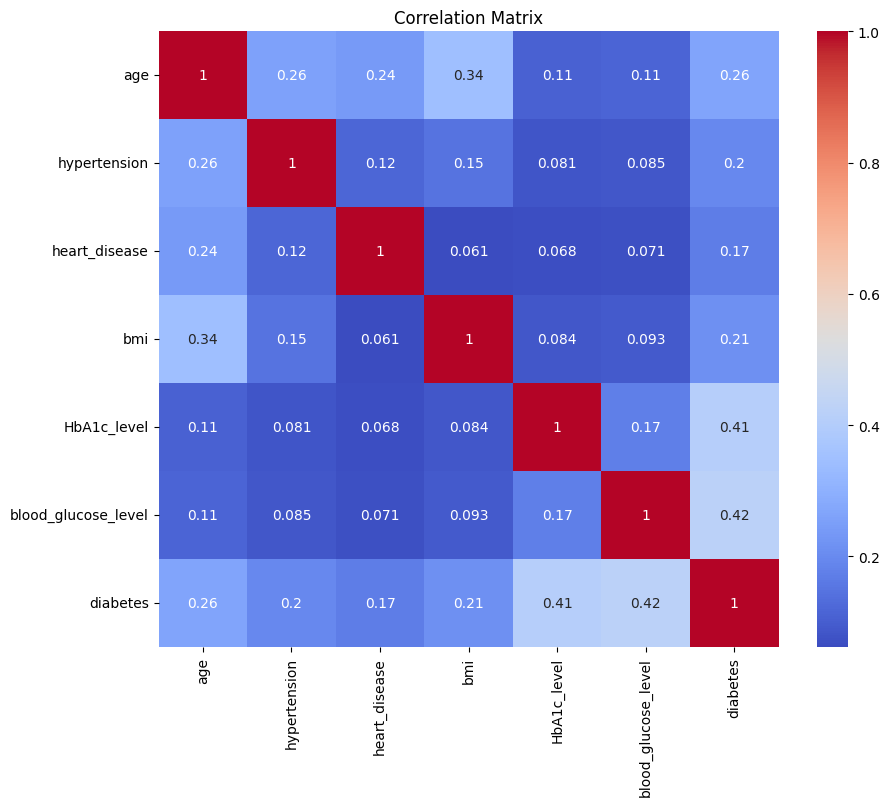

In [129]:

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Observing Age with BMI, HbA1c_level, and blood_glucose_level
* On the basis of data, by increasing age bmi also increases.
*  On the basis of data, Positive low corelation between age and HbA1c_level.
*  On the basis of data, Positive low corelation between age and blood_glucose_level.
  

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   gender                     96146 non-null  object  
 1   age                        96146 non-null  float64 
 2   hypertension               96146 non-null  int64   
 3   heart_disease              96146 non-null  int64   
 4   smoking_history            96146 non-null  object  
 5   bmi                        96146 non-null  float64 
 6   HbA1c_level                96146 non-null  float64 
 7   blood_glucose_level        96146 non-null  int64   
 8   diabetes                   96146 non-null  int64   
 9   heart_disease_categorical  96146 non-null  category
 10  hypertension_categorical   96146 non-null  category
 11  diabetes_categorical       96146 non-null  category
 12  age_cateogry               96146 non-null  category
dtypes: category(4), float64(3), int64(4)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,heart_disease_categorical,hypertension_categorical,diabetes_categorical,age_cateogry
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0,0,old_age
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0,0,old_age
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,0,0,youngs
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,0,0,middle
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1,0,old_age


In [ ]:
df.drop(df[df['smoking_history'] == 'No Info'].index, inplace=True) 

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,heart_disease_categorical,hypertension_categorical,diabetes_categorical,age_cateogry
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0,0,old_age
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,0,0,youngs
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,0,0,middle
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1,0,old_age
5,Female,20.0,0,0,never,27.32,6.6,85,0,0,0,0,youngs


In [ ]:

import plotly.express as px
fig = px.sunburst(
   df,
    path=['smoking_history','hypertension_categorical','heart_disease_categorical','gender', 'age_cateogry'],
    values= 'diabetes',
    color='gender',
    #  hover_data=['age_cateogry, 'hypertension_categorical']
)

# Show the Sunburst chart
fig.show()

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

g:\miniconda\envs\py35\Lib\site-packages\plotly\express\_core.py:1699: Fu

### Q6. On the basis of gender who had more diabetes that were smoking, had heart disease and hypertension?
A. Based on Data people who were smoking, had heart diesease and hypertension, male were having higher rate of Diabetes.
* Male: 28
* Female: 15

### Q7. On the basis of gender who had more diabetes that never smoked?
A. Based on Data people who never smoked, female were having higher rate of Diabetes.
* Female: 1288
* Male: 868


---
# `Summary` 

### Q1. Comparatively who has more Diabetes?
A. Based on given data females has more diabetes than male.

### Q2. Comparatively who has more heart_disease?
A. Based on given data male has more heart issues than female.
* Male: 2367
* Female: 1556
* Others: 0


### Q3. Comparatively who has more hypertension?
A. Based on given data female has more heart issues than male.
* Female: 4179
* Male: 3282
* Others: 0


### Q4. People with Hypertension and Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, Male has more Diabetes.
  * Male : 194
  * Female : 164

### Q5. People with no Hypertension and no Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, female has more Diabetes.
* Male 2518
* Female 2969

### Q6. On the basis of gender who had more diabetes that were smoking, had heart disease and hypertension?
A. Based on Data people who were smoking, had heart diesease and hypertension, male were having higher rate of Diabetes.
* Male: 28
* Female: 15

### Q7. On the basis of gender who had more diabetes that never smoked?
A. Based on Data people who never smoked, female were having higher rate of Diabetes.
* Female: 1288
* Male: 868


# `Conclusion`:
Based on the given data, here are the conclusions for each question:

- Comparatively, females have more diabetes than males.

- Comparatively, males have more heart disease than females.

- Comparatively, females have more hypertension than males.

-  Among people with both hypertension and heart disease, males have more diabetes than females.

-  Among people with neither hypertension nor heart disease, females have more diabetes than males.

-  Among individuals who were smoking, had heart disease, and hypertension, males have a higher rate of diabetes compared to females.

- Among individuals who never smoked, females have a higher rate of diabetes compared to males.